Import Dataset

In [1]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os

label_map = ['angry', 'happy', 'sad', 'surprise', 'neutral']

path0 = 'C:/Users/Poco/Jupyter/Emotion/FER-2013/train/angry/'
files0 = os.listdir(path0)
path1 = 'C:/Users/Poco/Jupyter/Emotion/FER-2013/train/happy/'
files1 = os.listdir(path1)
path2 = 'C:/Users/Poco/Jupyter/Emotion/FER-2013/train/sad/'
files2 = os.listdir(path2)
path3 = 'C:/Users/Poco/Jupyter/Emotion/FER-2013/train/surprise/'
files3 = os.listdir(path3)
path4 = 'C:/Users/Poco/Jupyter/Emotion/FER-2013/train/neutral/'
files4 = os.listdir(path4)

paths = [path0, path1, path2, path3, path4]
files = [files0, files1, files2, files3, files4]

Data Preprocessing

In [2]:
X, Y = [], []

for i in range(len(paths)):
    os.chdir(paths[i]) # 해당 경로로 이동
    for fname in files[i]:
        image = cv.imread(fname, cv.IMREAD_GRAYSCALE)
        im = cv.resize(image, (48, 48))
        im = im.astype('float32')
        im = (255 - im) / 255.0
        X.append(im)
        Y.append(i)

In [3]:
X, Y = np.array(X), np.array(Y)
N = X.shape[0] # number of data
X = X.reshape(N, 48, 48, 1)
N

30384

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

Deep Learning Model

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model1 = model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model2 = model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 24)        240       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 24)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        13888     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 128)        

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(128, (3, 3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(128, (3, 3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model3 = model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 separable_conv2d (Separable  (None, 42, 42, 128)      8896      
 Conv2D)                                                         
                                                      

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.Conv2D(64, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (2, 2), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model4 = model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 47, 47, 32)        160       
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 128)       32896     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 256)      

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(36, (2, 2), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(144, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (2, 2), activation = 'relu'))
model.add(layers.Conv2D(128, (2, 2), activation = 'relu'))
model.add(layers.Conv2D(128, (2, 2), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model5 = model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 47, 47, 36)        180       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 36)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 96)        13920     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 144)       55440     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 144)       

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = 'softmax'))

model.summary()
model6 = model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 64)        18496     
                                                      

In [11]:
import matplotlib.pyplot as plt

def train(model, epoch, bs):
    model.compile(optimizer = 'Adamax',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

    acc_train = []
    loss_train = []
    acc_test = []
    loss_test = []
    epochs = epoch
    for i in range(epochs):
        print("Epoch: {}".format(i+1))
        history = model.fit(x_train, y_train, epochs = 1, batch_size = bs)
        test = model.evaluate(x_test, y_test)
        acc_train.append(history.history['accuracy'][0])
        loss_train.append(history.history['loss'][0])
        acc_test.append(test[1])
        loss_test.append(test[0])
    print()
    print("epoch: {}, max accuracy: {}".format(np.array(acc_test).argmax() + 1, max(acc_test)))
    print("epoch: {}, min loss: {}".format(np.array(loss_test).argmin() + 1, min(loss_test)))
    
    epoch = range(1, epochs+1)
    plt.plot(epoch, acc_train, 'b', label = 'Train Accuracy')
    plt.plot(epoch, acc_test, 'r', label = 'Validation Accuracy')
    plt.ylim([0, 1])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    
    epoch = range(1, epochs+1)
    plt.plot(epoch, loss_train, 'b', label = 'Train Loss')
    plt.plot(epoch, loss_test, 'r', label = 'Validation Loss')
    plt.ylim([0, 2])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [12]:
model61 = model.__class__.from_config(model6.get_config())
model62 = model.__class__.from_config(model6.get_config())
model63 = model.__class__.from_config(model6.get_config())
model64 = model.__class__.from_config(model6.get_config())
model65 = model.__class__.from_config(model6.get_config())
model66 = model.__class__.from_config(model6.get_config())

Epoch: 1
190/190 [==============================] - 0s 2ms/step - loss: 0.8775 - accuracy: 0.6592

epoch: 1, max accuracy: 0.6592068672180176
epoch: 1, min loss: 0.8775143027305603


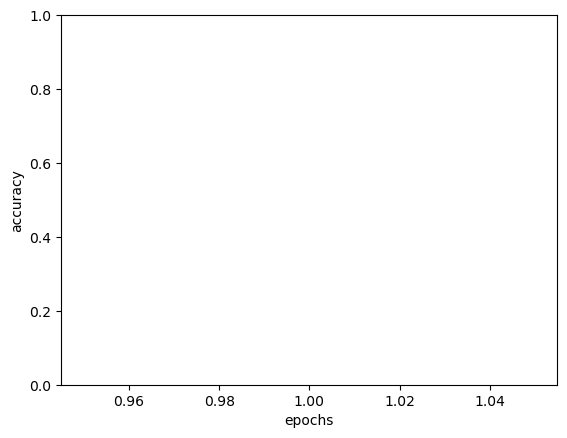

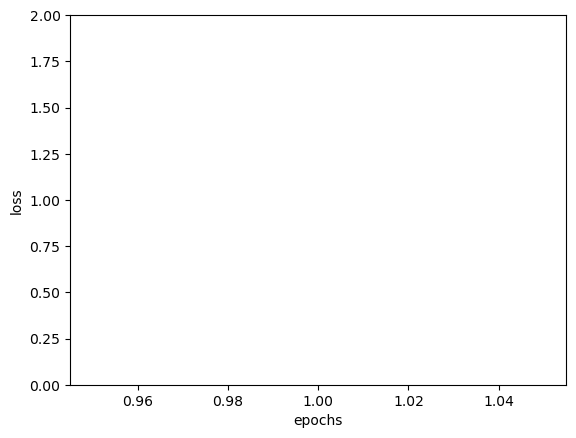

In [16]:
train(model61, 1, 180)

Epoch: 1
190/190 [==============================] - 0s 2ms/step - loss: 1.3844 - accuracy: 0.4573
Epoch: 2
190/190 [==============================] - 0s 2ms/step - loss: 1.2403 - accuracy: 0.5049
Epoch: 3
190/190 [==============================] - 0s 2ms/step - loss: 1.1189 - accuracy: 0.5511
Epoch: 4
190/190 [==============================] - 0s 2ms/step - loss: 1.0323 - accuracy: 0.5919
Epoch: 5
190/190 [==============================] - 0s 2ms/step - loss: 1.0056 - accuracy: 0.5935
Epoch: 6
190/190 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.6192
Epoch: 7
190/190 [==============================] - 0s 2ms/step - loss: 0.9214 - accuracy: 0.6409
Epoch: 8
190/190 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.6498
Epoch: 9
190/190 [==============================] - 0s 2ms/step - loss: 0.8914 - accuracy: 0.6447
Epoch: 10
190/190 [==============================] - 0s 2ms/step - loss: 0.8809 - accuracy: 0.6559
Epoch: 11
190/190 [

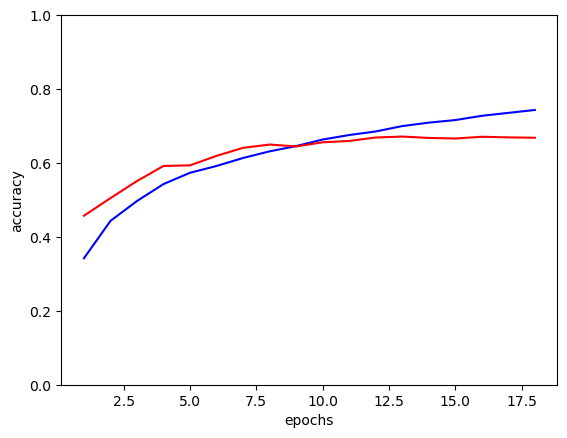

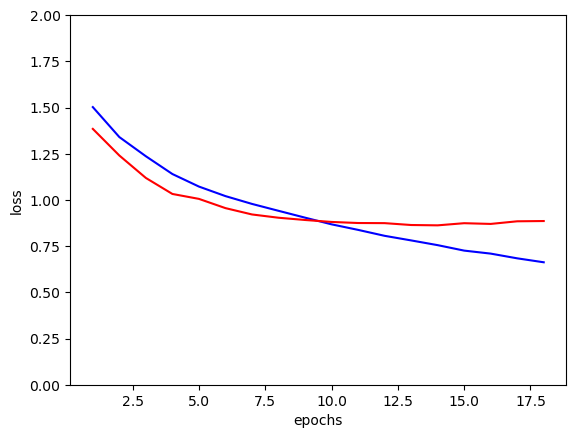

In [30]:
train(model62, 18, 16)

Epoch: 1
190/190 [==============================] - 0s 2ms/step - loss: 1.3678 - accuracy: 0.4484
Epoch: 2
190/190 [==============================] - 0s 2ms/step - loss: 1.2357 - accuracy: 0.5081
Epoch: 3
190/190 [==============================] - 0s 2ms/step - loss: 1.1165 - accuracy: 0.5462
Epoch: 4
190/190 [==============================] - 0s 2ms/step - loss: 1.0610 - accuracy: 0.5730
Epoch: 5
190/190 [==============================] - 0s 2ms/step - loss: 1.0012 - accuracy: 0.6042
Epoch: 6
190/190 [==============================] - 0s 2ms/step - loss: 0.9815 - accuracy: 0.6176
Epoch: 7
190/190 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.6238
Epoch: 8
190/190 [==============================] - 0s 2ms/step - loss: 0.9240 - accuracy: 0.6340
Epoch: 9
190/190 [==============================] - 0s 2ms/step - loss: 0.9068 - accuracy: 0.6469
Epoch: 10
190/190 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.6530
Epoch: 11
190/190 [

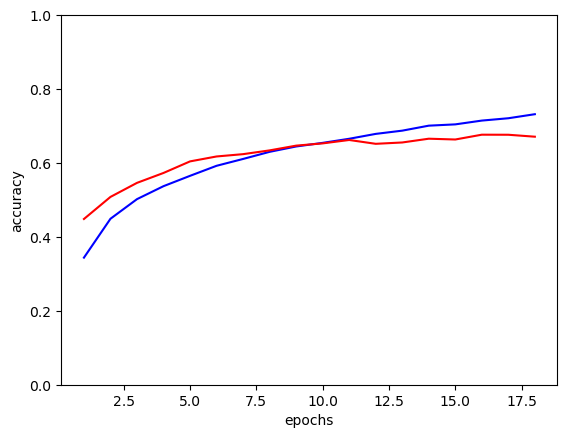

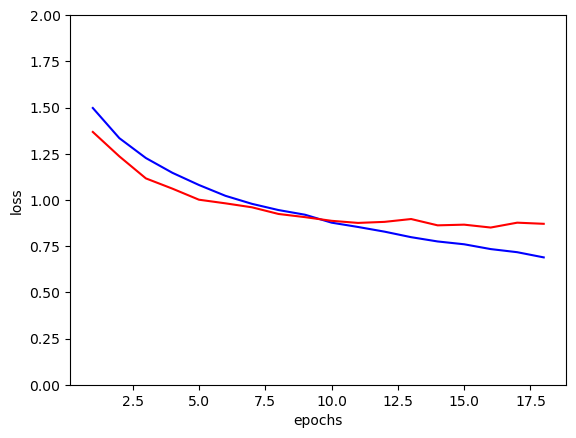

In [31]:
train(model63, 18, 16)

Epoch: 1
190/190 [==============================] - 1s 2ms/step - loss: 1.3630 - accuracy: 0.4497
Epoch: 2
190/190 [==============================] - 0s 2ms/step - loss: 1.2238 - accuracy: 0.5021
Epoch: 3
190/190 [==============================] - 0s 2ms/step - loss: 1.1265 - accuracy: 0.5483
Epoch: 4
190/190 [==============================] - 0s 2ms/step - loss: 1.0377 - accuracy: 0.5866
Epoch: 5
190/190 [==============================] - 0s 2ms/step - loss: 0.9953 - accuracy: 0.6049
Epoch: 6
190/190 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.6215
Epoch: 7
190/190 [==============================] - 0s 2ms/step - loss: 0.9547 - accuracy: 0.6261
Epoch: 8
190/190 [==============================] - 0s 2ms/step - loss: 0.9072 - accuracy: 0.6432
Epoch: 9
190/190 [==============================] - 0s 2ms/step - loss: 0.8988 - accuracy: 0.6497
Epoch: 10
190/190 [==============================] - 0s 2ms/step - loss: 0.9042 - accuracy: 0.6446
Epoch: 11
190/190 [

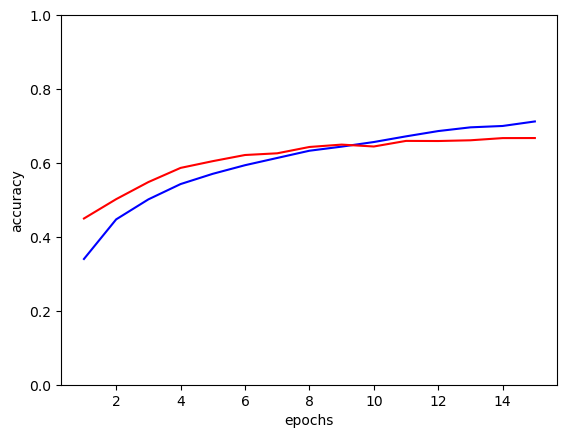

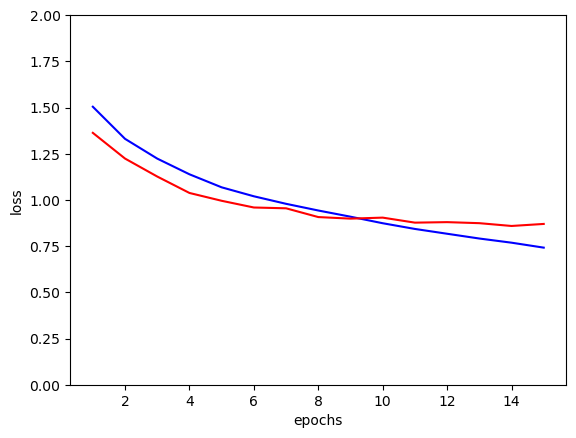

In [32]:
train(model64, 15, 16)

Epoch: 1
190/190 [==============================] - 1s 2ms/step - loss: 1.3493 - accuracy: 0.4450
Epoch: 2
190/190 [==============================] - 0s 2ms/step - loss: 1.2530 - accuracy: 0.5049
Epoch: 3
190/190 [==============================] - 0s 2ms/step - loss: 1.1362 - accuracy: 0.5504
Epoch: 4
190/190 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.5789
Epoch: 5
190/190 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.6036
Epoch: 6
190/190 [==============================] - 0s 2ms/step - loss: 0.9707 - accuracy: 0.6161
Epoch: 7
190/190 [==============================] - 0s 2ms/step - loss: 0.9444 - accuracy: 0.6291
Epoch: 8
190/190 [==============================] - 0s 2ms/step - loss: 0.9423 - accuracy: 0.6304
Epoch: 9
190/190 [==============================] - 0s 2ms/step - loss: 0.9125 - accuracy: 0.6375
Epoch: 10
190/190 [==============================] - 0s 2ms/step - loss: 0.8999 - accuracy: 0.6500
Epoch: 11
190/190 [

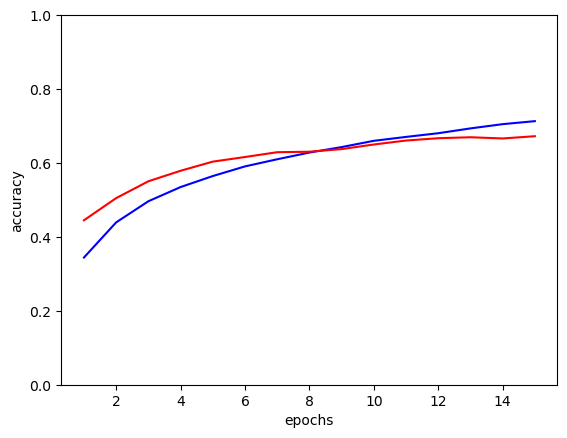

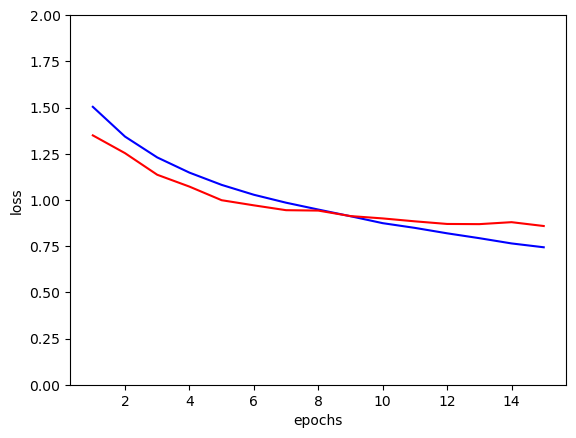

In [33]:
train(model65, 15, 16)

Epoch: 1
190/190 [==============================] - 1s 2ms/step - loss: 1.4138 - accuracy: 0.4329
Epoch: 2
190/190 [==============================] - 0s 2ms/step - loss: 1.2658 - accuracy: 0.4846
Epoch: 3
190/190 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.5218
Epoch: 4
190/190 [==============================] - 0s 2ms/step - loss: 1.1092 - accuracy: 0.5573
Epoch: 5
190/190 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.5911
Epoch: 6
190/190 [==============================] - 0s 2ms/step - loss: 0.9973 - accuracy: 0.6112
Epoch: 7
190/190 [==============================] - 0s 2ms/step - loss: 0.9717 - accuracy: 0.6210
Epoch: 8
190/190 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.6349
Epoch: 9
190/190 [==============================] - 0s 2ms/step - loss: 0.9211 - accuracy: 0.6434
Epoch: 10
190/190 [==============================] - 0s 2ms/step - loss: 0.9217 - accuracy: 0.6479
Epoch: 11
190/190 [

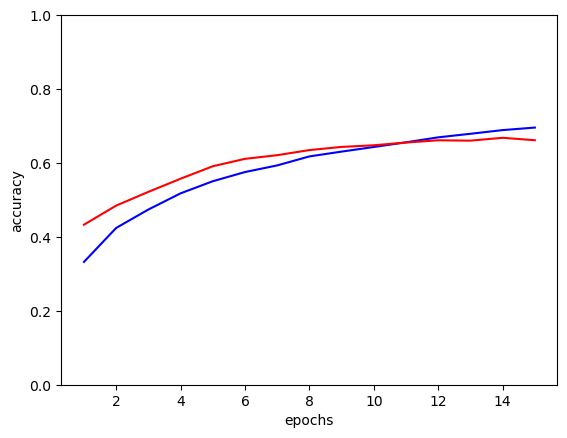

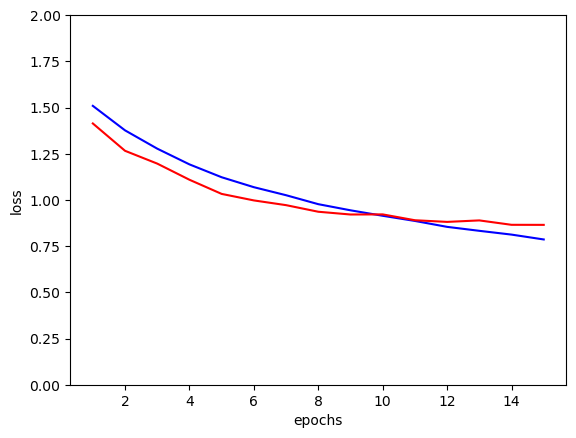

In [34]:
train(model66, 15, 16)

Final Model

In [38]:
model = model61

Confusion Matrix

In [64]:
from sklearn import metrics

pred = model.predict(x_test)
predLabel = []
for i in range(len(pred)):
    predLabel.append(int(pred[i].argmax()))
predic = np.array(predLabel)

res = tf.math.confusion_matrix(y_test, predic)
 
# Printing the result
print('Confusion_matrix: ',res)

190/190 [==============================] - 0s 2ms/step
Confusion_matrix:  tf.Tensor(
[[ 521   68  196   40  143]
 [  70 1517   93   39   93]
 [ 144   89  718   31  270]
 [  40   47   38  648   35]
 [ 107  147  224   38  721]], shape=(5, 5), dtype=int32)


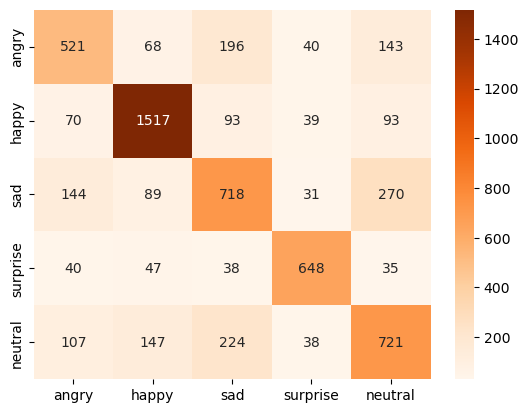

In [83]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

columns = label_map

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True, fmt='g')

Train & Test(Validation) Graph

In [86]:
"""
import matplotlib.pyplot as plt

epoch = range(1, epochs+1)
plt.plot(epoch, acc_train, 'b', label = 'Train Accuracy')
plt.plot(epoch, acc_test, 'r', label = 'Validation Accuracy')
plt.ylim([0, 1])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nepoch = range(1, epochs+1)\nplt.plot(epoch, acc_train, 'b', label = 'Train Accuracy')\nplt.plot(epoch, acc_test, 'r', label = 'Validation Accuracy')\nplt.ylim([0, 1])\nplt.xlabel('epochs')\nplt.ylabel('accuracy')\nplt.show()\n"

In [87]:
"""
import matplotlib.pyplot as plt

epoch = range(1, epochs+1)
plt.plot(epoch, loss_train, 'b', label = 'Train Loss')
plt.plot(epoch, loss_test, 'r', label = 'Validation Loss')
plt.ylim([0, 2])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nepoch = range(1, epochs+1)\nplt.plot(epoch, loss_train, 'b', label = 'Train Loss')\nplt.plot(epoch, loss_test, 'r', label = 'Validation Loss')\nplt.ylim([0, 2])\nplt.xlabel('epochs')\nplt.ylabel('loss')\nplt.show()\n"

In [88]:
# Save Model
import h5py

os.chdir('C:/Users/Poco/Jupyter/Emotion')
model.save('final.h5')

# If you want to load:

model = tf.keras.models.load_model('final.h5')

In [25]:
# If you want to load:

model = tf.keras.models.load_model('final.h5')

OSError: No file or directory found at final.h5

Test(Prediction) (교재 p.274 참고)

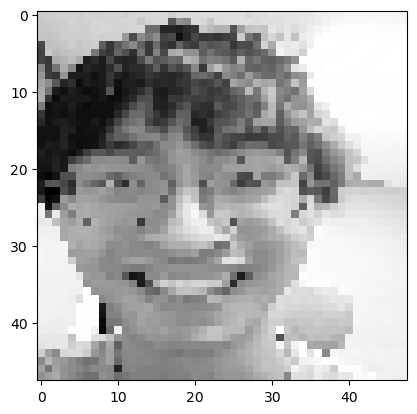

1/1 [==============================] - 0s 99ms/step
[('happy', 1.0), ('surprise', 0.01743946224451065), ('sad', 0.0028400691226124763), ('angry', 0.002296869643032551), ('neutral', 0.002022687578573823)]
1
happy
happy :  1.0
surprise :  0.01743946224451065
sad :  0.0028400691226124763
angry :  0.002296869643032551
neutral :  0.002022687578573823


In [89]:
import cv2 as cv
import operator

test_image = cv.imread('happy.jpg', cv.IMREAD_GRAYSCALE)
im = cv.resize(test_image, (48, 48))
im = im.astype('float32')
im = 255-im
im /= 255.0

plt.imshow(im, cmap = 'Greys')
plt.show()

pred = model.predict(im.reshape(-1, 48, 48, 1))
pred = pred.reshape(5)
normPred = pred / np.max(pred)
normPred = normPred.tolist()
dic = {name:value for name, value in zip(label_map, normPred)}
dicList = sorted(dic.items(), key = operator.itemgetter(1))
dicList.reverse()

print(dicList)
print(pred.argmax())
print(label_map[pred.argmax()])

for key, value in dicList:
    print(key, ": ", value)

Result

In [17]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
import h5py
import operator
import matplotlib.pyplot as plt
import time

model = tf.keras.models.load_model('final.h5')
label_map = ['angry', 'happy', 'sad', 'surprise', 'neutral']

In [18]:
def predict(image_path):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    im = cv.resize(image, (48, 48))
    im = im.astype('float32')
    im = (255 - im) / 255.0

    plt.imshow(im, cmap = 'Greys')
    plt.show()

    pred = model.predict(im.reshape(-1, 48, 48, 1))
    pred = pred.reshape(5)
    
    normPred = pred / np.max(pred)
    normPred = normPred.tolist()
    
    dic = {name:value for name, value in zip(label_map, normPred)}
    dicList = sorted(dic.items(), key = operator.itemgetter(1))
    dicList.reverse()
    
    
    for key, value in dicList:
        print(key, ": ", value)

Input image path: angry1.jpg


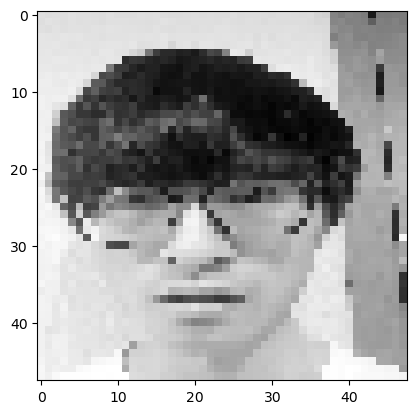

1/1 [==============================] - 0s 17ms/step
neutral :  1.0
sad :  0.8048539161682129
angry :  0.4729653596878052
surprise :  0.08834463357925415
happy :  0.029421886429190636
1871.5498447418213 ms


In [27]:
def main():
    image_path = input("Input image path: ")
    
    start = time.time()
    predict(image_path)
    end = time.time()
    
    print((end-start)*1000, 'ms')

if __name__ == "__main__":
    main()

Input image path: happy1.jpg


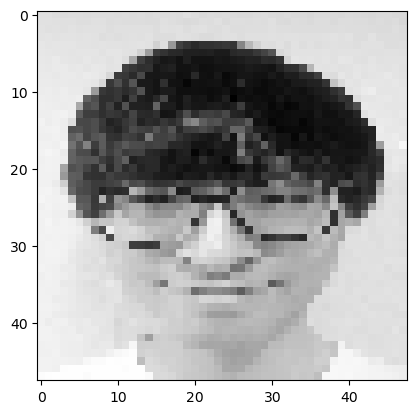

1/1 [==============================] - 0s 14ms/step
happy :  1.0
angry :  0.017770003527402878
neutral :  0.015029561705887318
sad :  0.004512823652476072
surprise :  0.000598886632360518
113.36088180541992 ms


In [29]:
if __name__ == "__main__":
    main()

Input image path: sad1.jpg


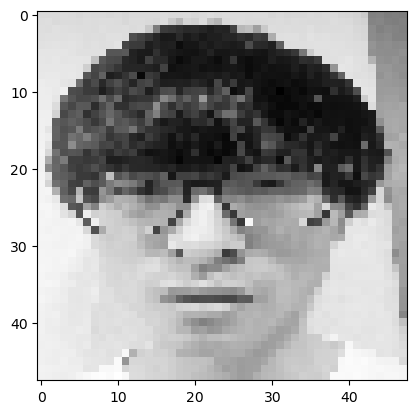

1/1 [==============================] - 0s 16ms/step
sad :  1.0
neutral :  0.9253336191177368
angry :  0.5229013562202454
surprise :  0.020846117287874222
happy :  0.013854381628334522
134.92679595947266 ms


In [30]:
if __name__ == "__main__":
    main()

Input image path: surprise1.jpg


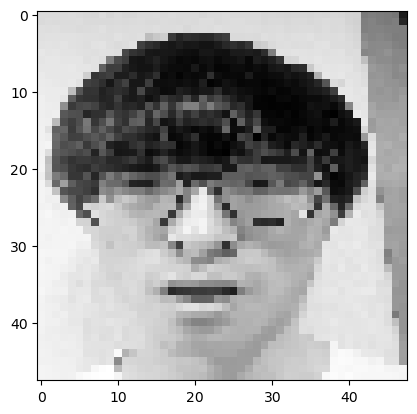

1/1 [==============================] - 0s 10ms/step
sad :  1.0
neutral :  0.9207784533500671
angry :  0.6816750764846802
surprise :  0.2542840242385864
happy :  0.14373266696929932
116.54114723205566 ms


In [32]:
if __name__ == "__main__":
    main()

Input image path: neutral1.jpg


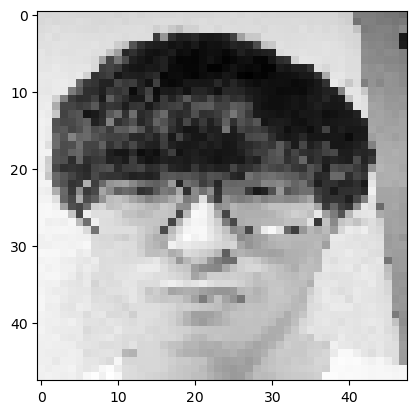

1/1 [==============================] - 0s 16ms/step
sad :  1.0
angry :  0.508959174156189
happy :  0.4987310767173767
neutral :  0.39082959294319153
surprise :  0.1255369931459427
131.072998046875 ms


In [33]:
if __name__ == "__main__":
    main()